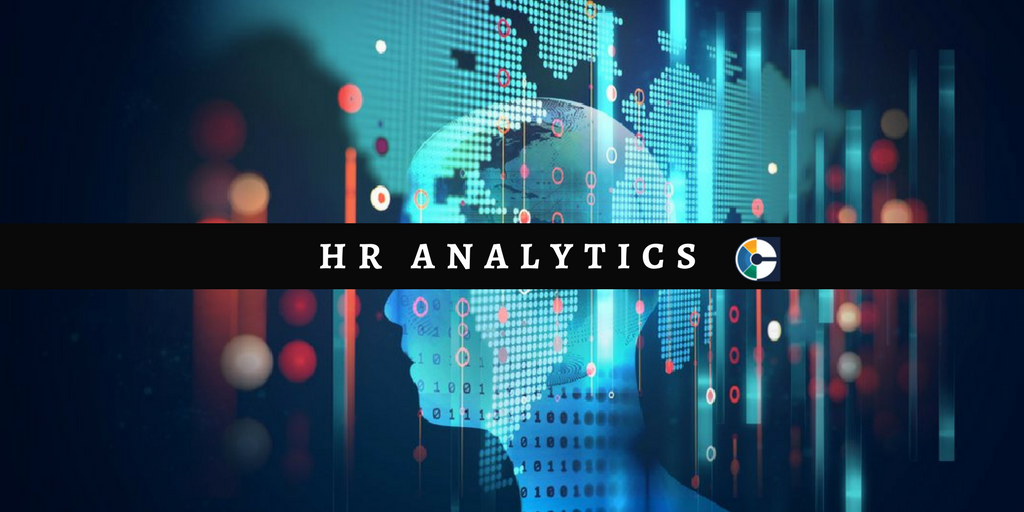

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### What  is  HR Analytics

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### What is Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### How  companies get Affected  by this: 
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

#### importing  some of  the important Libs  here 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Loading the Dataset.

In [4]:
hrDF = pd.read_csv(r'HR-Employee-Attrition.csv')

In [5]:
hrDF.shape

(1470, 36)

In [6]:
hrDF

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,NaN
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,NaN
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,NaN
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,NaN


#### Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('Attrition') data type indicates that dependent variable data is categorical in nature.

In [7]:
hrDF.columns.value_counts().sum()

36

In [10]:
# dropping  the  last column  as  it  has  all  the NAn  values  in it  so  its  our  no use
hrDF.drop(['Unnamed: 35'], axis=1, inplace=True)

#### Checking for null / values missing

In [15]:
hrDF.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset.

<AxesSubplot:>

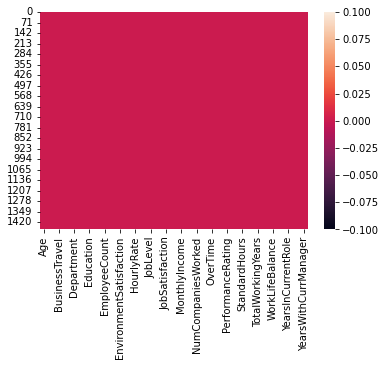

In [54]:
sns.heatmap(hrDF.isna())
#  no null  values  present   in the  datset 

In [6]:
hrDF.nunique() #Checking for unique elements in each of the columns

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

so  our target  variable  attrition has   2 unique  values  

In [7]:
hrDF.loc[:, hrDF.nunique() == 1]

,EmployeeCount,Over18,StandardHours
0,1,Y,80
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
...,...,...,...
1465,1,Y,80
1466,1,Y,80
1467,1,Y,80
1468,1,Y,80


There are 3 columns with only single type of values  present in them  like  the employee  hours , over 18, standard hours 

#### Getting the Basic info all  the  Datatypes in the  Dataset

In [16]:
hrDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
hrDF.dtypes[hrDF.dtypes == 'int64'] #int64 type columns

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [10]:
hrDF.dtypes[hrDF.dtypes != 'int64'] #object type columns

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

Thus  we  have  2  type   of  datatypes  present  here like  object and  Int

#### Statistical Description of the Dataset

In [20]:
hrDF.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In most columns mean and 50% are similar in value, and mean is greater than standard deviation, indicating a symmetric distribution.

Columns like TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager have a big difference between 75% and max indicating the presence of outliers.

as  the std deviation is  high so  there  are chances that - the datset  has  the skewness  present  in it 

#### Dataframe Description:


###### Feature Columns:
 
 0   Age                    
             
 2   BusinessTravel  
 
 3   DailyRate        
 
 4   Department         
 
 5   DistanceFromHome     
 
 6   Education            
 
 7   EducationField       
 
 8   EmployeeCount         
 
 9   EmployeeNumber      
 
 10  EnvironmentSatisfaction  
 
 11  Gender                   
 
 12  HourlyRate          
 
 13  JobInvolvement            
 
 14  JobLevel             
 
 15  JobRole               
 
 16  JobSatisfaction    
 
 17  MaritalStatus        
 
 18  MonthlyIncome     
 
 19  MonthlyRate           
 
 20  NumCompaniesWorked    
 
 21  Over18                
 
 22  OverTime              
 
 23  PercentSalaryHike      
 
 24  PerformanceRating       
 
 25  RelationshipSatisfaction  
 
 26  StandardHours           
 
 27  StockOptionLevel         
 
 28  TotalWorkingYears       
 
 29  TrainingTimesLastYear    
 
 30  WorkLifeBalance          
 
 31  YearsAtCompany           
 
 32  YearsInCurrentRole       
 
 33  YearsSinceLastPromotion  
 
 34  YearsWithCurrManager     
 
###### Label:
 
   Attrition 

#### Analyzing  the Dataset and  Exploration of  the  Dataset

#####  Analyzing the Target Class

In [21]:
hrDF['Attrition'].unique() 

array(['Yes', 'No'], dtype=object)

#### There are 2 unique catergorical values in the Label column / target variable.

In [22]:
hrDF['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Class   
'No'   : Has 1233 values

'Yes'   : Has 237 values



There  is  class  imbalance  in the  Target  Data

#### Univariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

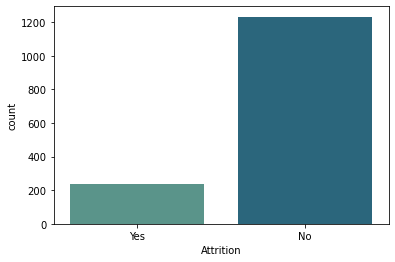

In [24]:
sns.countplot(hrDF['Attrition'], palette="crest")

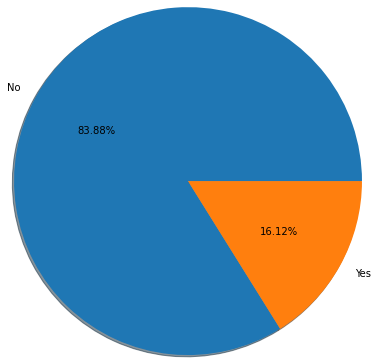

In [30]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(hrDF['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True)
plt.show()

Class   
'No'   : Has 83.88% of total values

'Yes'  : Has 16.12% of total values




#### Classes are imbalanced.

In [31]:
hrDF['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

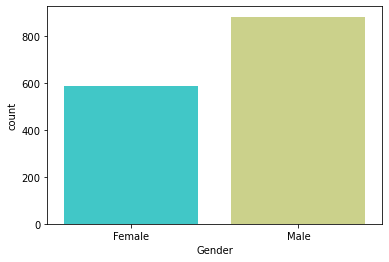

In [33]:
sns.countplot(hrDF['Gender'], palette="rainbow")

There are more Male employees than Female Employees.

In [34]:
hrDF['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

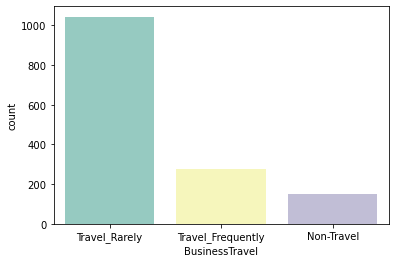

In [35]:
sns.countplot(hrDF['BusinessTravel'], palette="Set3")

Most employees Travel Rarely, followed by those who Travel Frequently and then there are 'Non-Travel'.

In [36]:
hrDF['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

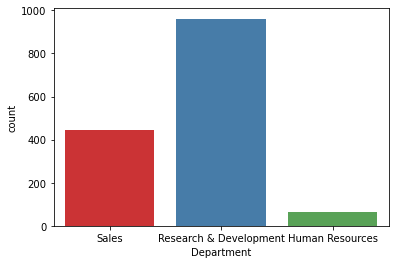

In [37]:
sns.countplot(hrDF['Department'], palette="Set1")

Most employees belong to Research and Development, followed by Sales and then Human Resources.

In [38]:
hrDF['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

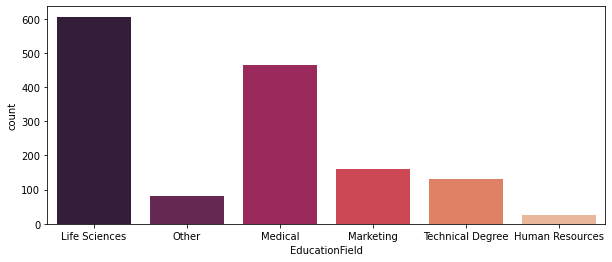

In [39]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(hrDF['EducationField'], palette="rocket")

Highest number of employees have an Educational background in Life Sciences, Followed by Medical.

In [24]:
hrDF['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

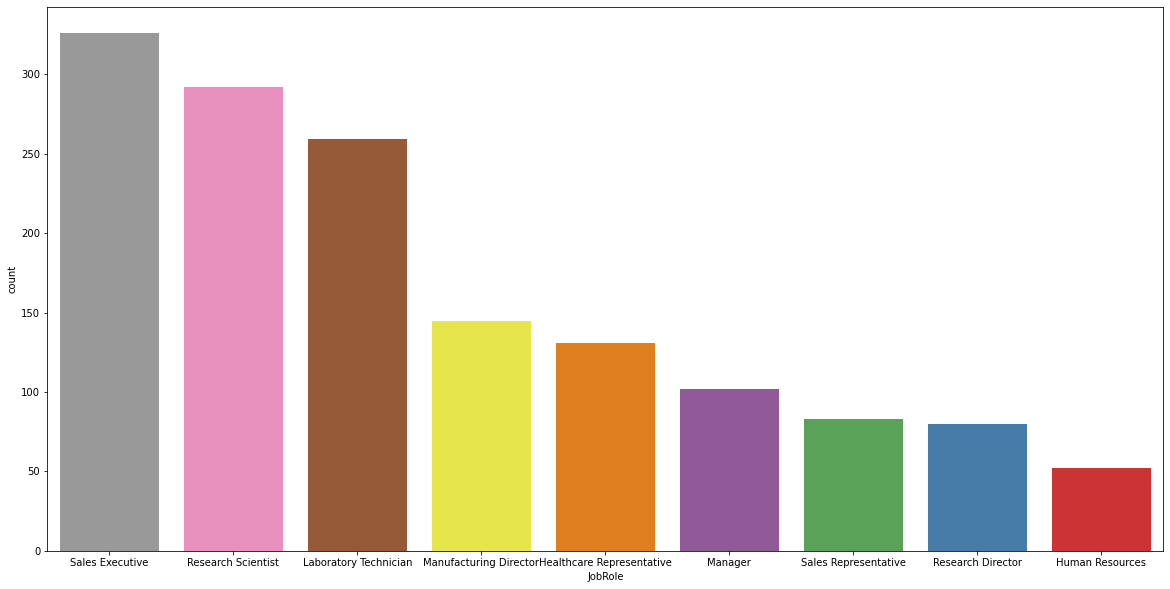

In [40]:
plt.figure(figsize=(20,10),facecolor='white')
sns.countplot(hrDF['JobRole'], palette="Set1_r")

Highest number of Employees are Sales Executives, followed by Research Scientist and Laboratory Technicians.

In [41]:
hrDF['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

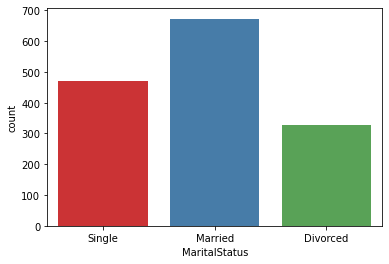

In [42]:
sns.countplot(hrDF['MaritalStatus'], palette="Set1")

Highest number of employees is Married, followed by Single and then by Divorced.

In [43]:
hrDF['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

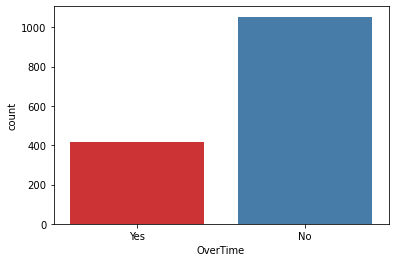

In [44]:
sns.countplot(hrDF['OverTime'], palette="Set1")

Most  of  Employees don't want  to  do Overtime  or  dont  do than those who do.

#### Interpreting Relationship between Dependent Variable and Independent Variables

Bivariate  and  Multivariate  Analysis

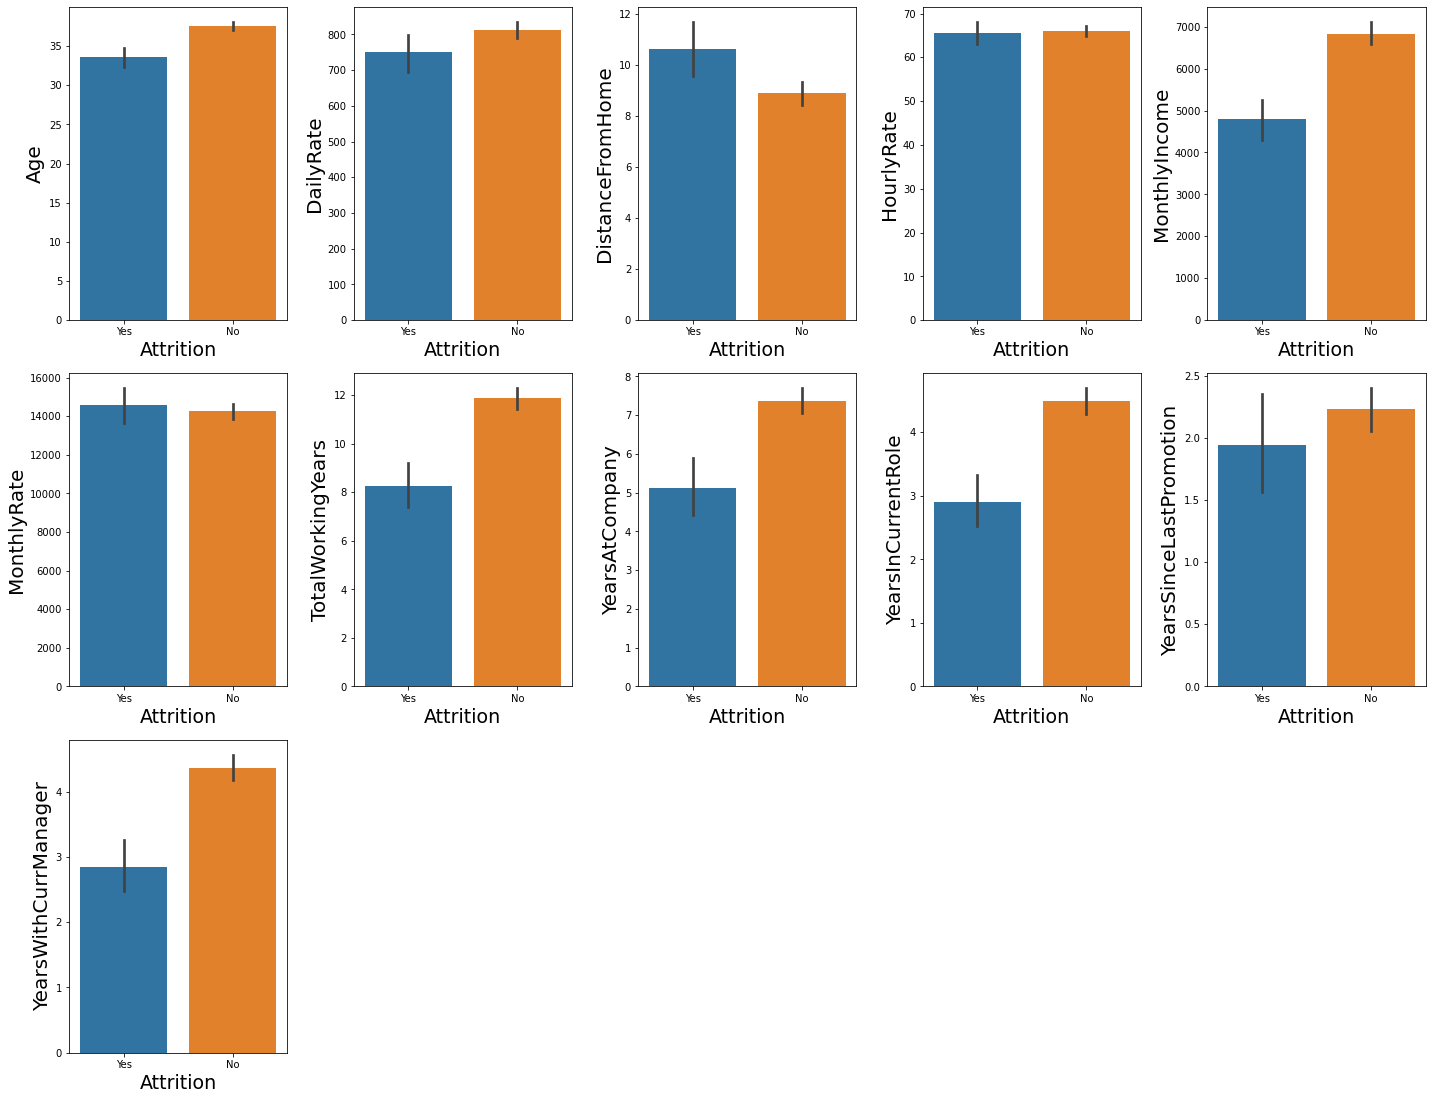

In [47]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = hrDF['Attrition']
X = hrDF[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Attrition',fontsize=19)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs the following observations are made:

Ages under 35 are contributing the most to Attrition, while high number of people who are 35 and above have been retained.

In terms of DailyRate, there isn't much of a difference in number between those who left and those who didnt, however attrition is higher amongst those with lower DailyRate

Distance from home greater than 10 is a deciding factor for Attrition

HourlyRate doesn't seem to contribute to Attrition.

Those employees whose MonthlyIncome is below 5000 are contributing to Attrition

MonthlyRate doesn't have a big effect on Attrition

Employees having Total working years under 9 are mostly contributing to Attrition

Employees having worked 6 years at the company or less have more impact on Attrition.

Employees having gone upto 2 years since last promotion have higher Attrition.

Employees having worked under current manager for 3 years and less have high Attrition.

##### 'Attrition' vs Categorical Data Columns

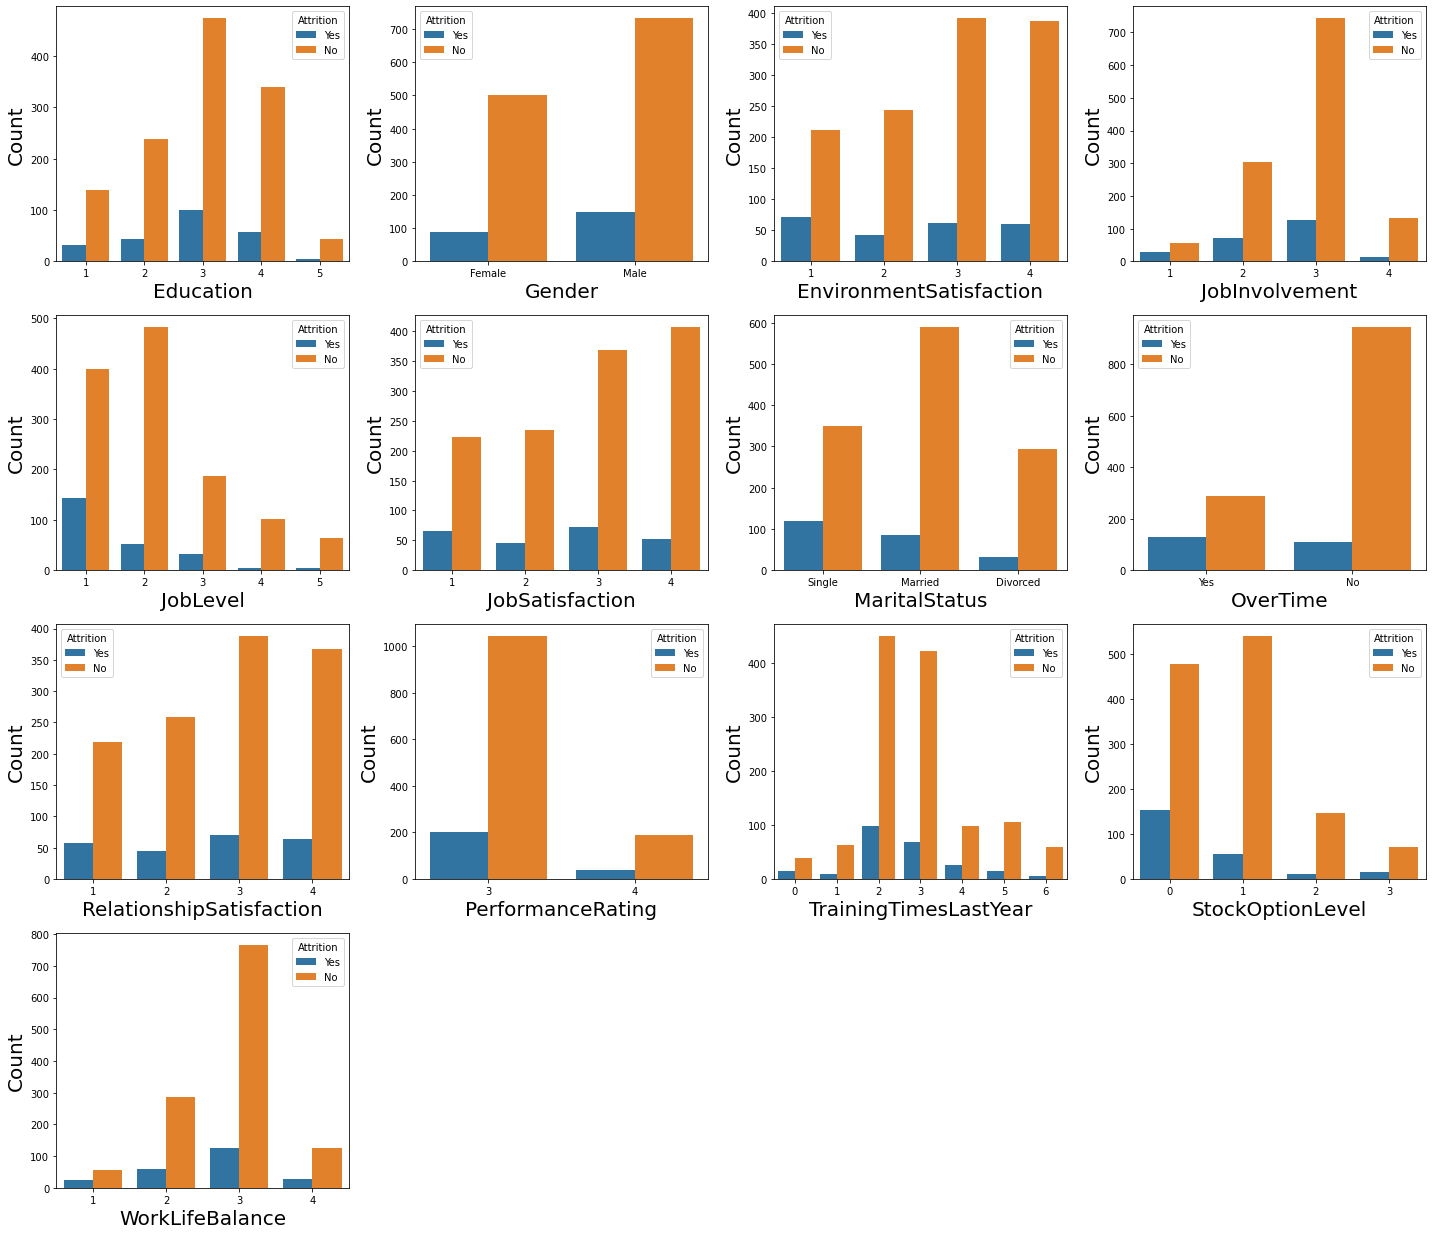

In [31]:
plt.figure(figsize=(20,21),facecolor='white')
plotnum=1
X = hrDF[['Education','Gender','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','PerformanceRating','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance']]
y = hrDF['Attrition']
for col in X:
    if plotnum<=23:
        plt.subplot(5,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

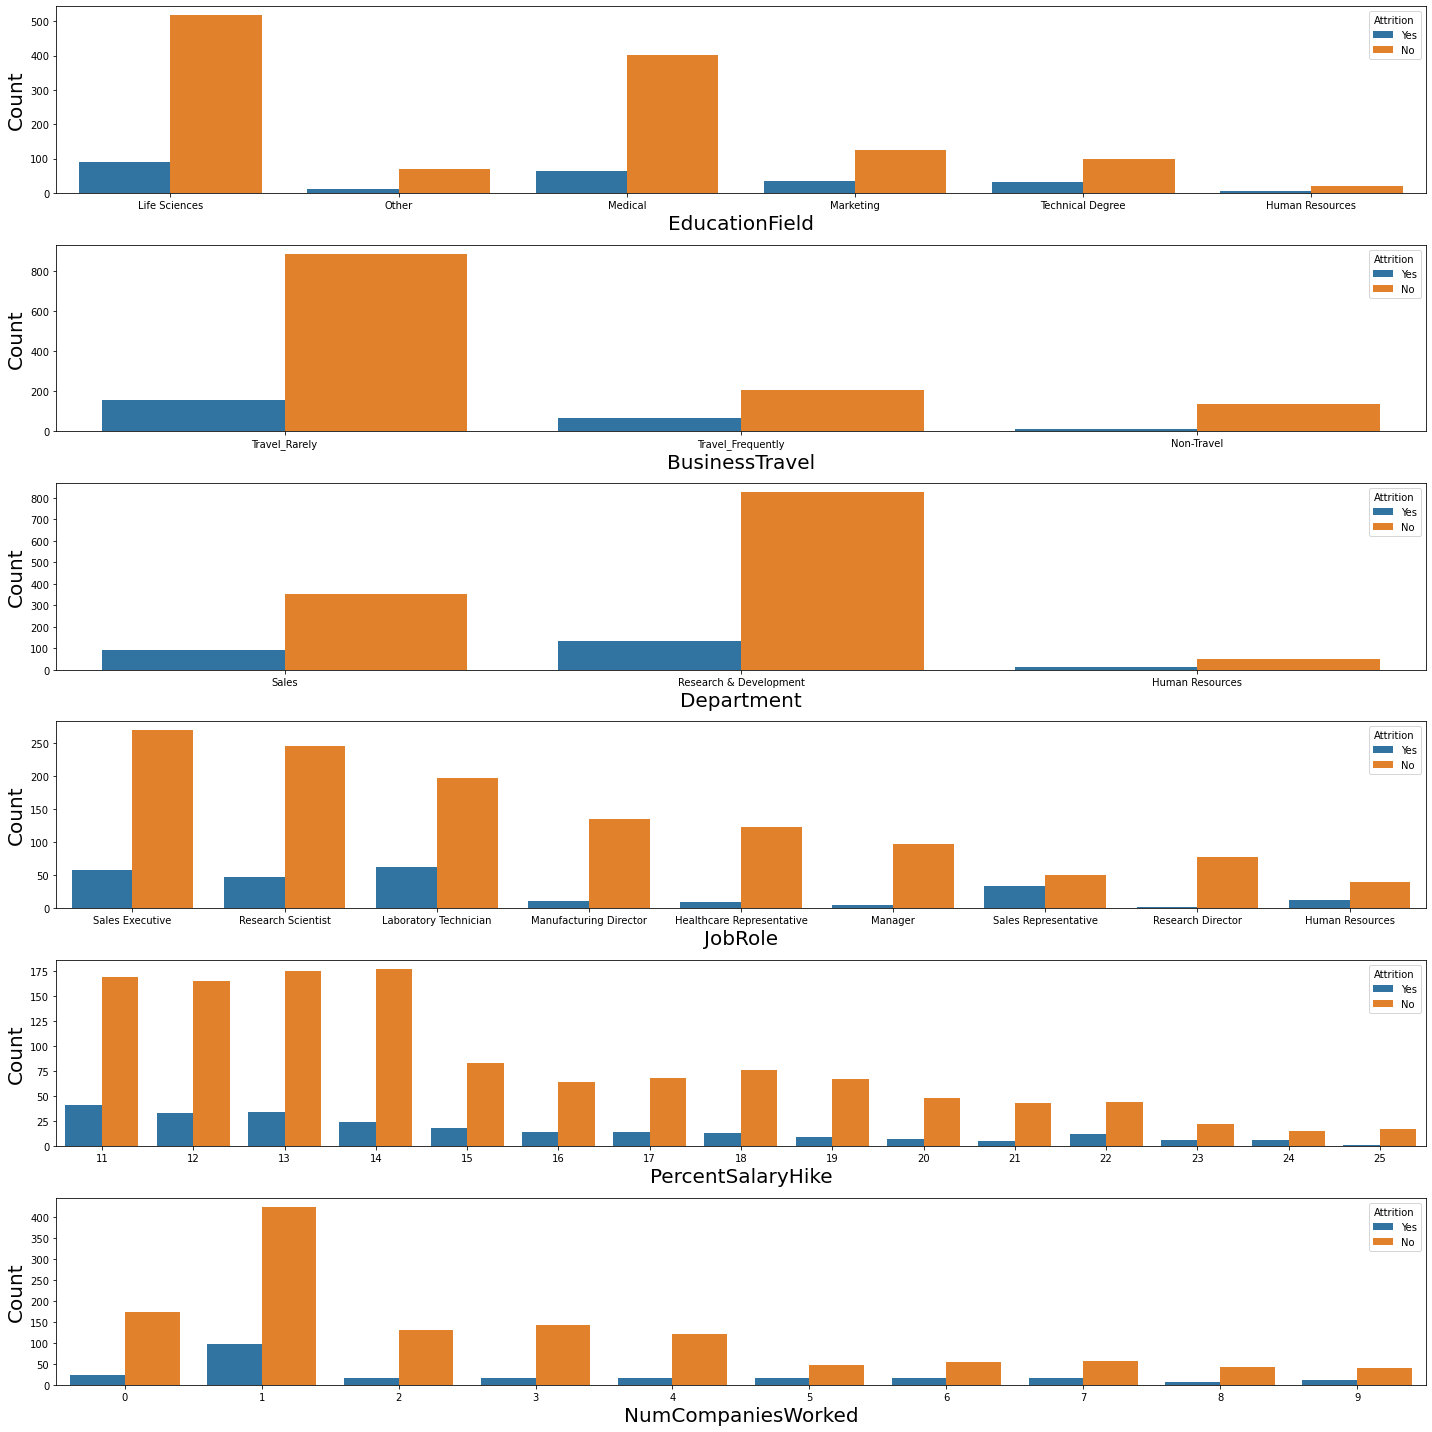

In [32]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
X = hrDF[['EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked']]
y = hrDF['Attrition']
for col in X:
    if plotnum<=23:
        plt.subplot(6,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

#### From the graphs above the following observations can be made:

Employees with Education '3' and '4' are retained the most. Employees with  Education '3' are also the most to leave.  
    
Employees with EducationFields Life Sciences and Medical are retained the most. Employees with EducationFields Life Sciences are also the most to leave.    
    
Employees who Travel rarely are retained the most.    
    
Employees belonging to Reseach and Development  are retained the most followed by Sales.  While Employees belonging to Reseach and Development also contribute the most to Attrition.
    
The number of male employees retained is a bit greater than the number of female employees retained. Male employees also contribute the most to Attrition.

Employees with greater Environment Satisfaction are retained. While Employees with lowest Environment Satisfaction contribute the most to Attrition.

Employees with Job Involvement of 3 are retained the most.

Employees with Job level 3 and 2 are retained the most. While employees with job Level 1 contribute the most to Attrition.

Sales Executives,Research Scientists, Laboratory Technicians are amongst the most retained employees. Sales Executives and Laboratory Technicians also contribute more to attrition than Research Scientists.

Employees with Highest Job Satisfaction of 4 and 3  are amongst the most retained employees.   
    
More Married Employees are retained than single and divorced.

Employees who don't do overtime are retained the most.

Employees who have worked in 1 and 0 companies before are retained more than those with work history in multiple companies.
While employees who have worked in 1 company before are the most to leave.

Employees with lowest Salary percentage hike contribute most to Attrition.

Employees with Highest Relationship Satisfaction of 3 and 4 are those who are retained the most.

Employees with Performance Rating 3 are retained a lot more than those with Performance Rating 4 

Employees with Training Times of 2 and 3 Last Year are retained the most.

Employees with StockOption level 1 are retained the most. While Employees with stock optoion level 0 contribute most to Attrition.

Employees with worklife balance of 3 are retained the most.


#### Correlation analysis

In [48]:
hrDF.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


#### Dropping columns 'EmployeeCount','Over18','StandardHours' and 'EmployeeNumber' as they are not required for predicting values of target column

In [55]:
hrDF.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

In [56]:
hrDF.shape

(1470, 31)

####  Checking for the Outliers

In [57]:
X = hrDF.drop(columns = ['Attrition'])
y = hrDF['Attrition']

#### Visualizing  the Outliers  with  the  Boxplot

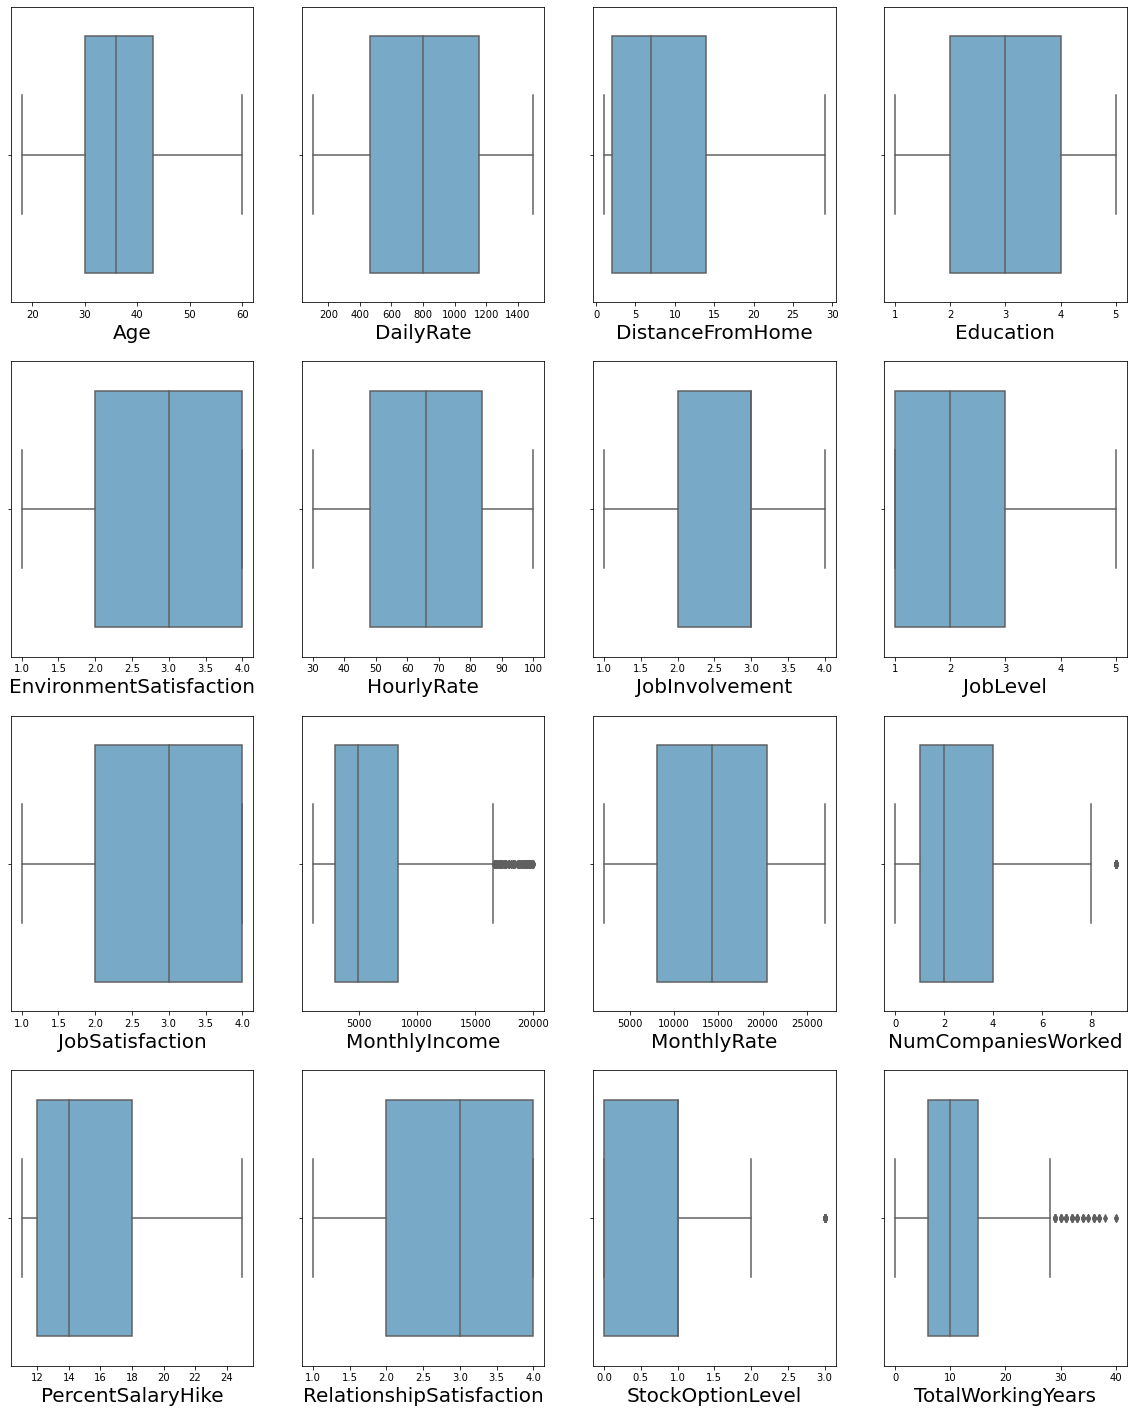

In [67]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col], palette='Blues', orient='v')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

'MonthlyIncome' and 'TotalWorkingYears' have a lot of outliers. even in the Stock option level  also  we  have  outliers 

#### Removing Outliers using Z score Method

In [68]:
df2 = X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']).copy()

In [69]:
df2

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,11,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,11,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,17,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,15,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,14,4,0,17,3,2,9,6,0,8


In [70]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [71]:
df3.shape

(1387, 22)

In [72]:
df2.shape

(1470, 22)

##### Data loss %:

In [74]:
loss=(1470-1387)/1470 * 100
print('The loss  in after removing ouliers:',loss)

The loss  in after removing ouliers: 5.646258503401361


5.646% data loss is within acceptable range.

#### Using IQR Method

In [75]:
df =X.drop(columns = ['BusinessTravel','Department','PerformanceRating','EducationField','Gender','JobRole','MaritalStatus','OverTime']).copy()

In [76]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [77]:
indxdrop

array([  25.,   29.,   45.,   62.,  105.,  106.,  112.,  119.,  123.,
        147.,  165.,  186.,  187.,  190.,  194.,  231.,  233.,  237.,
        244.,  257.,  263.,  270.,  279.,  280.,  290.,  314.,  326.,
        329.,  379.,  392.,  400.,  411.,  417.,  425.,  429.,  445.,
        466.,  473.,  477.,  489.,  497.,  535.,  538.,  561.,  568.,
        584.,  588.,  592.,  595.,  609.,  653.,  699.,  710.,  714.,
        716.,  741.,  746.,  749.,  755.,  766.,  770.,  774.,  799.,
        804.,  810.,  814.,  851.,  858.,  861.,  867.,  869.,  894.,
        898.,  899.,  904.,  907.,  913.,  916.,  918.,  922.,  936.,
        937.,  945.,  954.,  955.,  956.,  999., 1008., 1009., 1024.,
       1043., 1055., 1080., 1116., 1126., 1129., 1135., 1140., 1154.,
       1184., 1185., 1225., 1242., 1264., 1277., 1330., 1331., 1348.,
       1351., 1374., 1377., 1401., 1437., 1443.,    4.,   38.,   50.,
         95.,  105.,  122.,  194.,  198.,  208.,  245.,  287.,  290.,
        334.,  371.,

In [78]:
df = df.drop(indxdrop)

In [79]:
df.shape

(925, 22)

##### Data loss %:

In [80]:
loss=(1470-925)/1470 * 100
print('The  dataloss from IQR  technique:',loss)

The  dataloss from IQR  technique: 37.07482993197279


37.07% data loss is outside acceptable range.

#### Using Z score method to Drop outliers

In [81]:
dropindx = X.index.difference(df3.index)

In [82]:
dropindx

Int64Index([  28,   45,   62,   63,   64,   85,   98,  110,  123,  126,  153,
             178,  187,  190,  218,  231,  237,  270,  281,  326,  386,  401,
             411,  425,  427,  445,  466,  473,  477,  535,  561,  584,  592,
             595,  616,  624,  635,  653,  677,  686,  701,  716,  746,  749,
             752,  799,  838,  861,  875,  894,  914,  918,  922,  926,  937,
             956,  962,  976, 1008, 1024, 1043, 1078, 1086, 1093, 1111, 1116,
            1135, 1138, 1156, 1184, 1221, 1223, 1242, 1295, 1301, 1303, 1327,
            1331, 1348, 1351, 1401, 1414, 1430],
           dtype='int64')

In [83]:
hrDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [52]:
hrDF.reset_index(drop=True,inplace = True)

In [84]:
hrDF.shape

(1387, 31)

In [85]:
X = hrDF.drop(columns = ['Attrition'])
y = hrDF['Attrition']

#### Checking for Skewness in Data

In [86]:
X.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

There  is  a  skewness  in many  of  the  Data columns 

#### Checking  the skewness  level  with  the  Distribution plots 

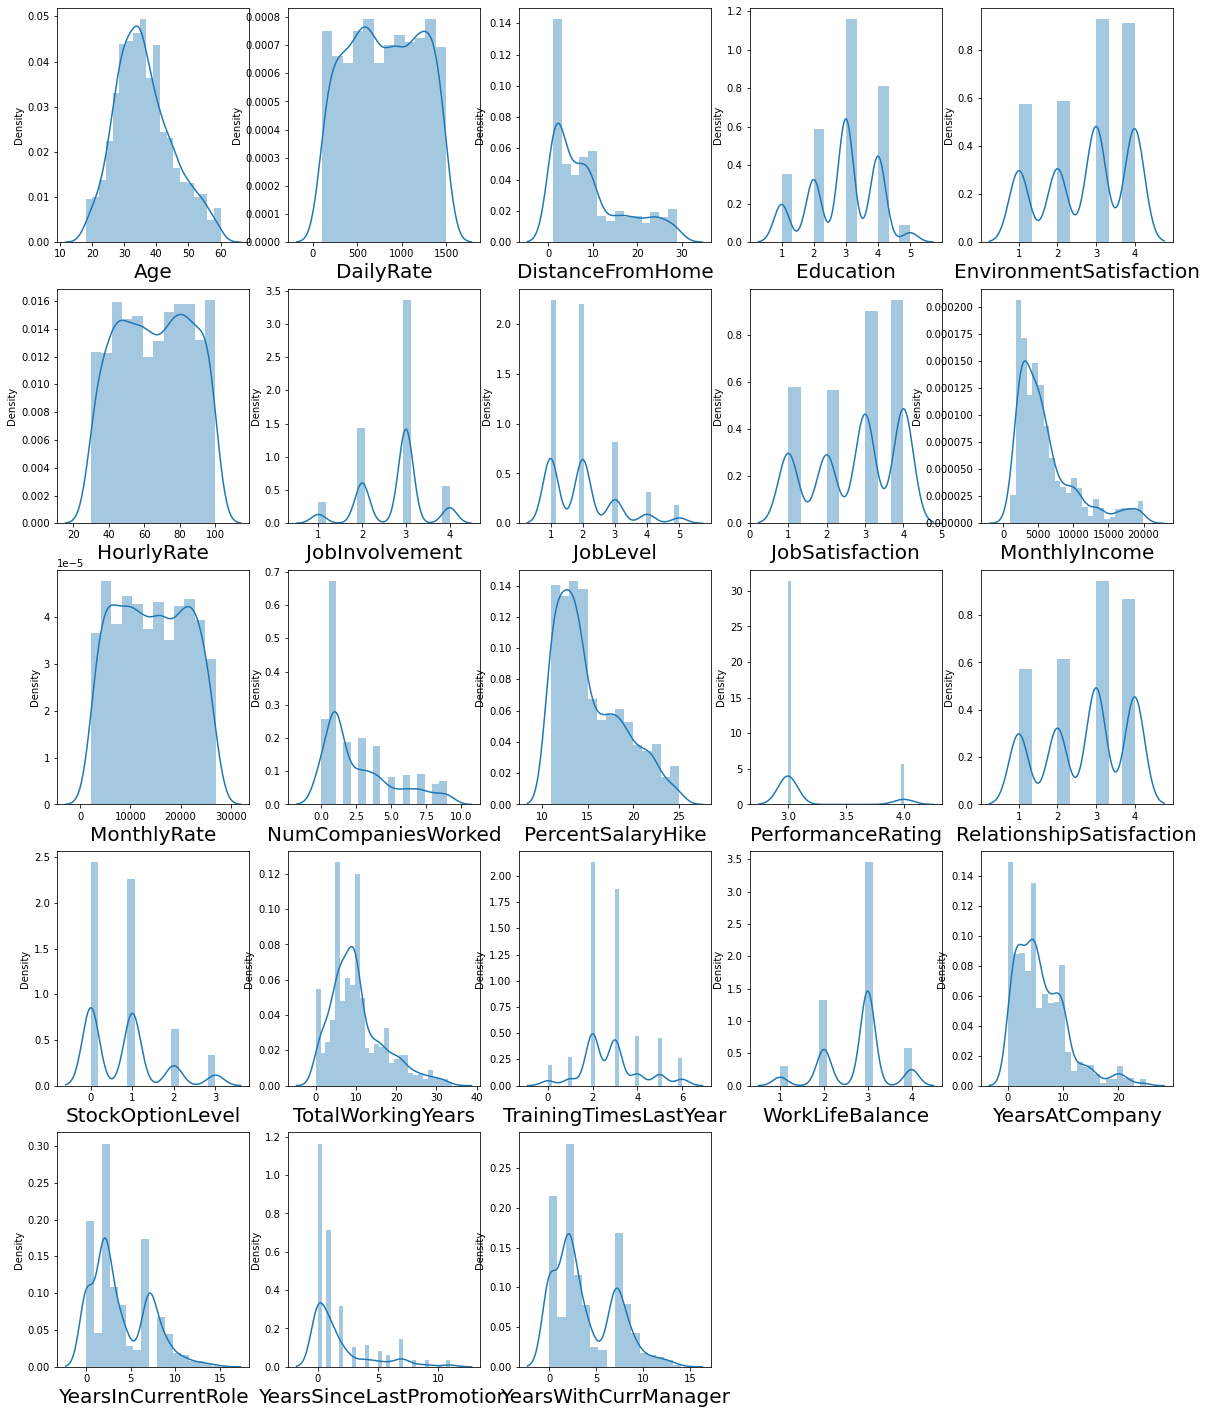

In [56]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Considerable skewness exists in DistanceFromHome, MonthlyIncome, TotalWorkingYears, YearsatCompany,PercentSalaryHike,YearsWithCurrManager,YearsInCurrentRole

#### Reducing skewness further using PowerTransformer

In [88]:
from sklearn.preprocessing import PowerTransformer

In [89]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [90]:
df4 = X[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']]

In [91]:
transformed= powtrans.fit_transform(df4)

In [92]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [93]:
transformed.skew()

DistanceFromHome       -0.008149
MonthlyIncome           0.027700
TotalWorkingYears      -0.009666
YearsAtCompany         -0.025230
PercentSalaryHike       0.112128
YearsWithCurrManager   -0.070570
YearsInCurrentRole     -0.069631
dtype: float64

In [94]:
transformed.index = X.index

In [95]:
X[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']] = transformed[['DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole']]

In [96]:
X.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     1.756335
YearsWithCurrManager       -0.070570
dtype: float64

#### skewness  check after  Transformation 

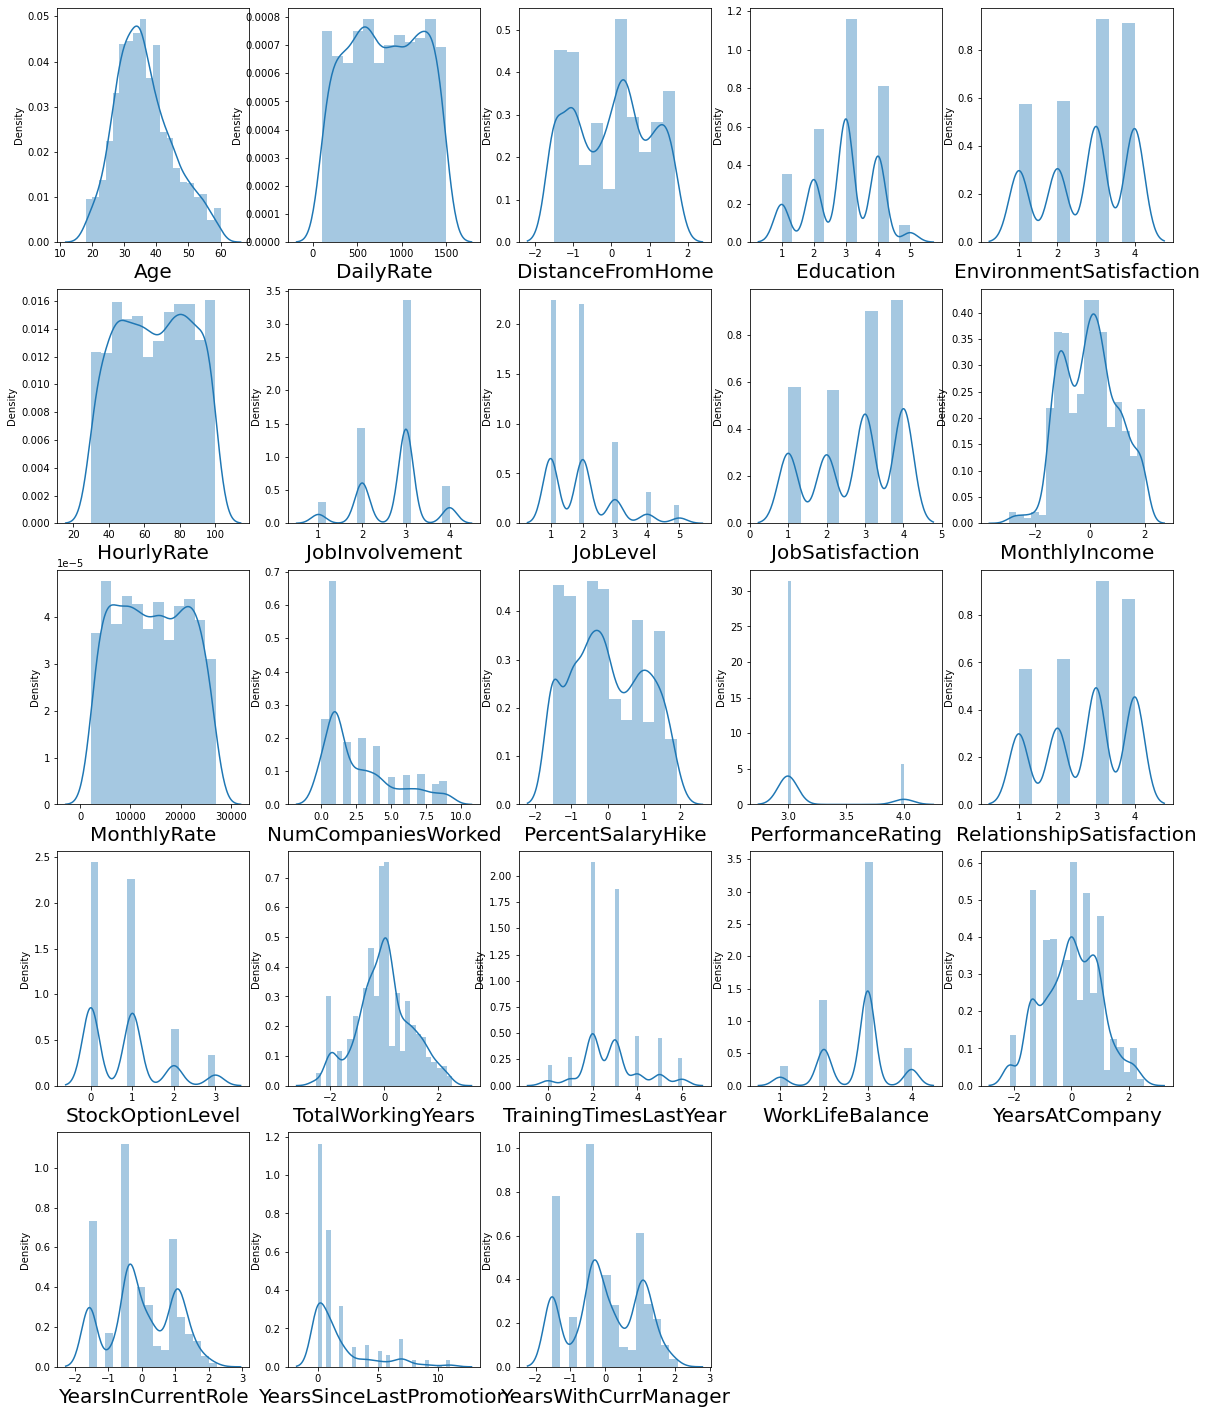

In [97]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

###### Distributions look much more Normalised now from before 

### Encoding the  categorical Feature Columns.

In [98]:
X[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

#### Encoding using get_dummies()

In [99]:
dumm = pd.get_dummies(X[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']],drop_first = False)

In [100]:
dumm

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [101]:
hrDF = hrDF.join(dumm)

In [102]:
hrDF.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis = 1, inplace = True)

##### Encoding the Label Column.

In [103]:
hrDF['Attrition'] = hrDF.Attrition.map({'No':0,'Yes':1}) #'No' = 1 and 'Yes' = 0

#### Finding Correlation 

In [106]:
h_corr = hrDF.corr()
h_corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,-0.159366,0.021946,-0.011265,0.198502,0.014098,0.025465,0.036424,0.453902,0.011763,...,0.061446,0.165491,-0.119866,0.007654,-0.168373,0.036596,0.091845,-0.130318,-0.034180,0.034180
Attrition,-0.159366,1.000000,-0.057220,0.081788,-0.032703,-0.112393,-0.001532,-0.133957,-0.171968,-0.114206,...,-0.090209,-0.097808,-0.004986,0.015434,0.157980,-0.080700,-0.101353,0.179495,-0.257237,0.257237
DailyRate,0.021946,-0.057220,1.000000,-0.008171,-0.018442,0.033123,0.014279,0.048004,0.022978,0.042698,...,-0.014813,0.016283,-0.004643,-0.010386,0.003315,0.040548,0.041039,-0.079647,-0.020294,0.020294
DistanceFromHome,-0.011265,0.081788,-0.008171,1.000000,0.001084,-0.019279,0.028230,0.010106,0.008498,-0.009284,...,0.011713,-0.027756,-0.014761,0.034281,-0.016038,0.004160,0.024992,-0.030328,-0.026520,0.026520
Education,0.198502,-0.032703,-0.018442,0.001084,1.000000,-0.026223,0.010848,0.041343,0.083065,-0.007219,...,-0.006030,0.045844,0.007292,0.069973,-0.090292,0.011180,0.000043,-0.009942,0.017166,-0.017166
EnvironmentSatisfaction,0.014098,-0.112393,0.033123,-0.019279,-0.026223,1.000000,-0.040459,-0.012720,0.013835,-0.011186,...,0.055462,-0.061219,-0.001729,-0.025347,0.002229,0.021593,-0.017646,-0.000300,-0.059355,0.059355
HourlyRate,0.025465,-0.001532,0.014279,0.028230,0.010848,-0.040459,1.000000,0.049577,-0.034507,-0.069016,...,-0.018920,-0.016141,0.024934,-0.018134,-0.018789,-0.014746,0.035844,-0.025163,0.004304,-0.004304
JobInvolvement,0.036424,-0.133957,0.048004,0.010106,0.041343,-0.012720,0.049577,1.000000,-0.005280,0.003910,...,-0.009888,0.029434,0.046520,-0.013387,-0.029403,0.014984,0.040123,-0.056041,-0.000837,0.000837
JobLevel,0.453902,-0.171968,0.022978,0.008498,0.083065,0.013835,-0.034507,-0.005280,1.000000,0.014973,...,0.151584,0.408857,-0.383965,0.176239,-0.216561,0.024662,0.058378,-0.084072,-0.005305,0.005305
JobSatisfaction,0.011763,-0.114206,0.042698,-0.009284,-0.007219,-0.011186,-0.069016,0.003910,0.014973,1.000000,...,-0.021864,-0.013848,0.013386,0.015694,-0.001428,-0.006833,-0.021538,0.029012,-0.025022,0.025022


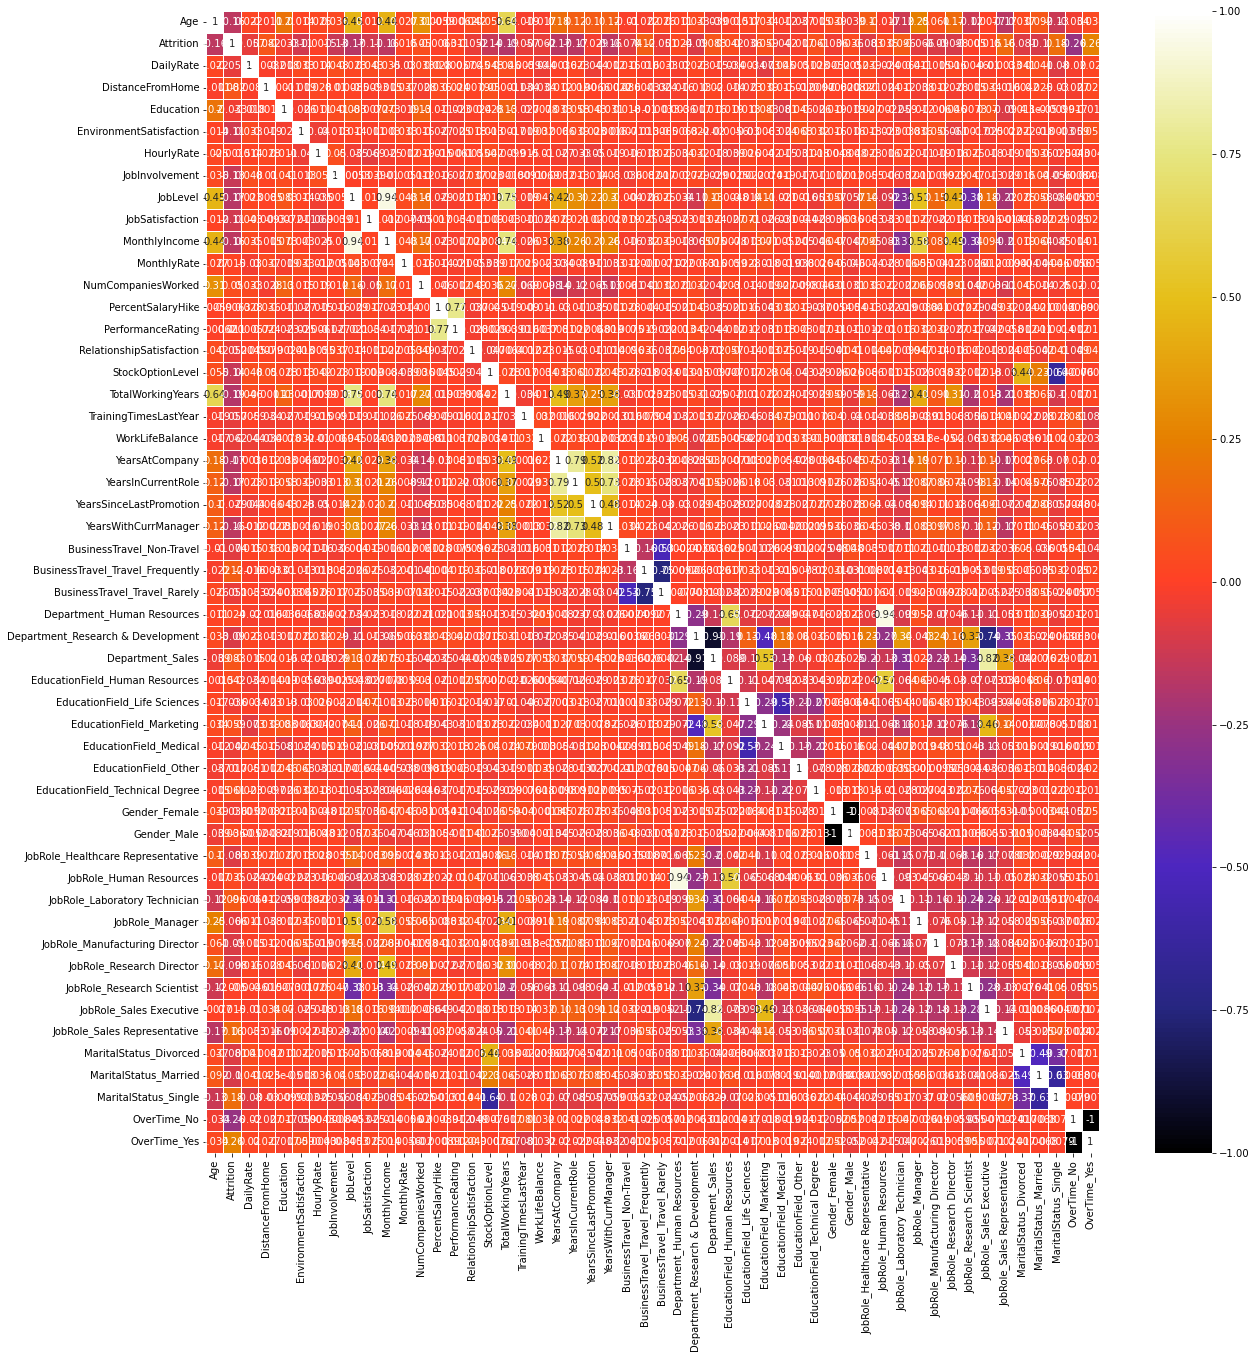

In [111]:
plt.figure(figsize=(20,21))
sns.heatmap(h_corr,annot=True,linewidth=1, cmap='CMRmap')
plt.show()


### Visualizing correlation of feature columns with label column.

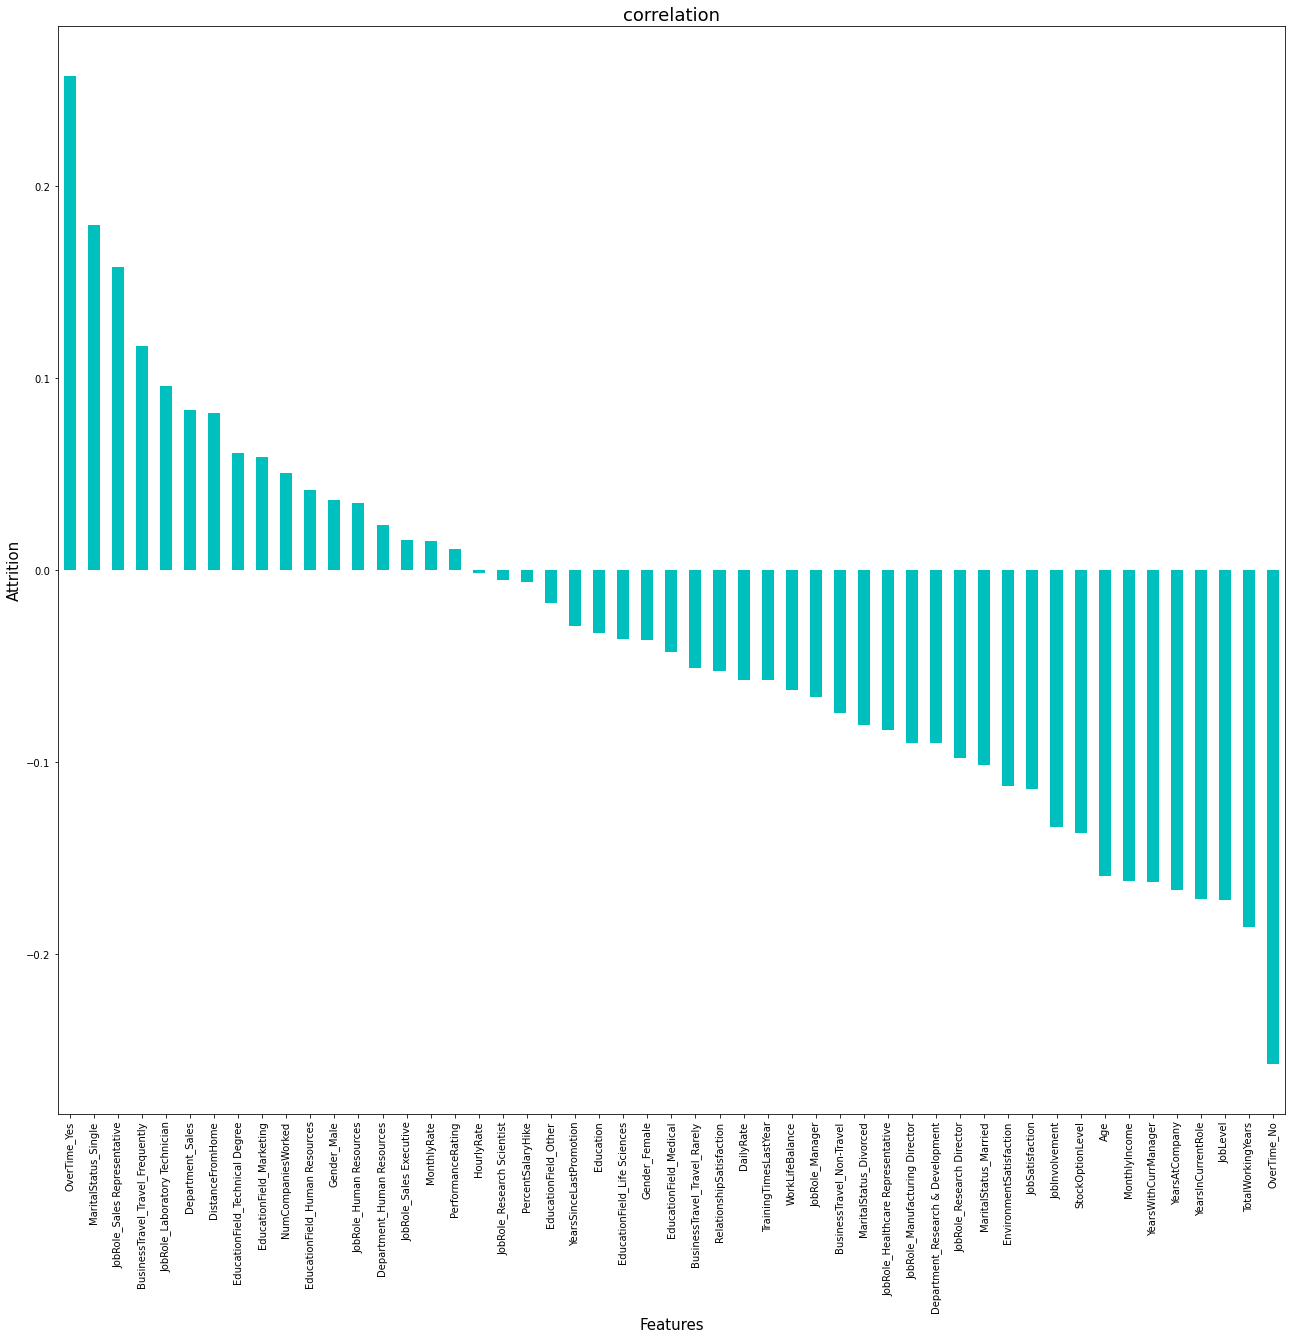

In [112]:
plt.figure(figsize = (22,20))
hrDF.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

OverTime_Yes,Marital_status_Single,JobRole_Laboratory_Technician,BusinessTravel_Travel_Frequently,Department_Sales,DistanceFromHome,EducationField have the highest postive correlation with Attrition.

OverTime_No,TotalWorkingYears,JobLevel,YearsAtCompany,YearWithCurrManager,Age,StockOptionLevel,JobInvolvement,JobSatisfaction have the highest negative correlation with Attrition.

we  cansee  that  in this  dataset we  have  more  of inverse  correlation .

In [113]:
X = hrDF.drop(columns = ['Attrition'])
y = hrDF['Attrition']

#### Feature Scaling  using Standard Scaler

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [116]:
scaled_X 

array([[ 0.5366811 ,  0.73432467, -1.01124882, ...,  1.45014078,
        -1.58473733,  1.58473733],
       [ 1.44211114, -1.30776866, -0.14552139, ..., -0.68958822,
         0.6310194 , -0.6310194 ],
       [ 0.08396607,  1.40675151, -0.88757347, ...,  1.45014078,
        -1.58473733,  1.58473733],
       ...,
       [-1.04782149, -1.61544736, -0.64022278, ..., -0.68958822,
        -1.58473733,  1.58473733],
       [ 1.44211114,  0.53830356, -0.88757347, ..., -0.68958822,
         0.6310194 , -0.6310194 ],
       [-0.2555702 , -0.44180199, -0.14552139, ..., -0.68958822,
         0.6310194 , -0.6310194 ]])

#### Checking for Multicollinearity using Variance Inflation Factor

As  we  have many feature  variable   thus there  is  high chances  of  Multicollinearity of  the  features   which  when if not  removed  may  confuse  the  predictive model

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
vif = pd.DataFrame()

In [123]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [124]:
vif

,Features,vif,Features variety
0,Age,1.878680,Age
1,DailyRate,1.043237,DailyRate
2,DistanceFromHome,1.025918,DistanceFromHome
3,Education,1.086541,Education
4,EnvironmentSatisfaction,1.037339,EnvironmentSatisfaction
5,HourlyRate,1.029373,HourlyRate
6,JobInvolvement,1.029936,JobInvolvement
7,JobLevel,12.023097,JobLevel
8,JobSatisfaction,1.030254,JobSatisfaction
9,MonthlyIncome,14.719401,MonthlyIncome


MonthlyIncome,JobLevel show multicollinearity. But  still we cant  drop  it  directly as  it may  contribute  to our  label  so  keeping  this  in  mind lets  reduce   the  dimensions of  the  Dataset  which will  give  some  better  understanding 

#### Principle Component Analysis

In [125]:
from sklearn.decomposition import PCA

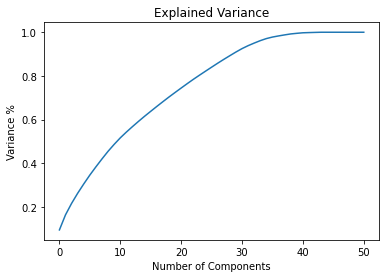

In [85]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

40 components explain around 95% variance in Data

#### Applying PCA

In [126]:
pca = PCA(n_components=40)
new_comp = pca.fit_transform(scaled_X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(40))

In [127]:
principle_x

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.493521,2.180150,-1.035862,2.270673,1.902768,1.036032,0.488234,-1.132088,-0.742788,-2.005591,...,1.947743,-0.719044,0.077474,-0.885553,0.092792,0.283462,-0.125659,-0.631926,-0.716254,0.202079
1,0.274680,-1.613992,-0.319479,-2.135736,0.045249,-0.016935,0.815114,2.215013,2.607774,-1.277388,...,0.773616,1.466000,1.540332,-0.048853,0.146973,0.073791,-0.200611,-0.402593,-0.157724,0.264010
2,-2.969044,-0.800545,-0.141664,1.950696,0.211026,0.262386,2.108020,-1.849118,0.288006,0.709023,...,1.638679,0.533759,-0.464173,0.254454,0.355009,0.395626,-0.079762,-0.250379,0.197478,0.008086
3,-0.930553,-1.011918,-0.770096,-0.289062,2.317767,2.633587,0.497397,0.894334,-1.788328,-1.778004,...,-1.286197,0.163261,-0.270759,0.407491,-0.116201,-1.121920,-1.043134,0.752687,-0.278351,0.446699
4,-2.101520,-1.051084,0.546413,0.098348,-1.825121,-0.903813,-0.754331,-0.890790,-0.535372,1.692976,...,1.712001,0.381502,-1.423167,-0.621235,-0.393064,-0.145839,-0.050290,0.125307,-0.201876,-0.059164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.892286,-1.375133,0.195486,-0.707784,-1.323132,-0.363997,0.586689,1.854969,-0.215962,1.521987,...,0.780105,0.526663,0.441916,-0.500410,-0.016369,-0.121826,0.553640,0.721504,0.819535,-0.242762
1383,1.318051,-1.549315,0.107439,-0.579085,-1.279172,-0.781150,-0.850879,-1.030627,0.147239,1.743577,...,0.687380,0.884446,0.133905,-1.131018,-0.289001,-0.000626,-0.259884,-0.786530,0.022707,-0.144994
1384,-0.868870,-1.246802,0.021704,0.261364,-0.541784,2.038862,0.752819,-0.521692,3.029311,-1.913625,...,-0.367872,-0.837706,-0.369705,-0.324681,-0.056628,0.001213,0.202261,0.259577,-0.667907,0.371010
1385,1.763367,1.799659,-0.229475,-1.198909,-0.574504,-0.550331,0.914235,1.137096,-0.536550,1.279598,...,-0.106807,-0.506622,2.468196,-0.606172,0.340864,-0.828271,0.288693,-0.358587,-0.118823,-0.475451


####  Feature Engineeering

In [128]:
from sklearn.feature_selection import SelectKBest, f_classif

In [129]:
bestfeat = SelectKBest(score_func = f_classif, k = 51)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [130]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(51,'Score'))

                              Feature      Score
49                        OverTime_No  98.140453
50                       OverTime_Yes  98.140453
16                  TotalWorkingYears  49.422063
48               MaritalStatus_Single  46.108256
7                            JobLevel  42.206842
20                 YearsInCurrentRole  41.726267
19                     YearsAtCompany  39.467993
22               YearsWithCurrManager  37.468266
9                       MonthlyIncome  37.255699
0                                 Age  36.092149
45       JobRole_Sales Representative  35.451007
15                   StockOptionLevel  26.364601
6                      JobInvolvement  25.307350
24   BusinessTravel_Travel_Frequently  19.155690
8                     JobSatisfaction  18.303387
4             EnvironmentSatisfaction  17.719366
47              MaritalStatus_Married  14.375051
42          JobRole_Research Director  13.377392
39      JobRole_Laboratory Technician  12.805449
27  Department_Resea

#### Selecting best features based on their scores and dropping a highly colinear column 'MonthlyIncome'.

In [131]:
x_best = X.drop(columns=['MonthlyIncome','YearsSinceLastPromotion','Department_Human Resources','EducationField_Other','JobRole_Sales Executive','MonthlyRate','PerformanceRating','PercentSalaryHike','JobRole_Research Scientist','HourlyRate']).copy()

In [132]:
x_best

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,3,2,4,8,1,...,0,0,0,0,0,0,0,1,0,1
1,49,279,8,1,3,2,2,2,1,4,...,0,0,0,0,0,0,1,0,1,0
2,37,1373,2,2,4,2,1,3,6,2,...,1,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,3,1,3,1,3,...,0,0,0,0,0,0,1,0,0,1
4,27,591,2,1,1,3,1,2,9,4,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,4,2,4,4,3,...,1,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,2,3,1,4,1,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,4,2,2,1,2,...,0,0,1,0,0,0,1,0,0,1
1468,49,1023,2,3,4,2,2,2,2,4,...,0,0,0,0,0,0,1,0,1,0


In [133]:
scaled_x_best = scaler.fit_transform(x_best)

Since  the  Dataset is  the  classification problem  as  the Label  data  is  non_numerical  data 

### Classification Model Building

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Finding the best random state

In [136]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .22, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")


Best Accuracy is: 0.9183006535947712 on random_state: 71


In [137]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .22, stratify = y,random_state = 71) #since class imbalance exists

In [138]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

####  Importing all  the neccessary Algorithms

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [170]:
#  Calling  the Instances 
RFC = RandomForestClassifier(n_estimators=600,random_state=71,criterion='gini', max_depth=4)
XGBC= XGBClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC(kernel='linear')
KNN = KNeighborsClassifier()

####  Training the Models

In [158]:
### training Random forest classifier
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=600, random_state=71)

In [164]:
#Training XGboost classifier
XGBC.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [171]:
# Training  support vector classifier
SV.fit(x_train,y_train)

SVC(kernel='linear')

In [159]:
# Training logistic regression classifier
LOGR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [174]:
# Training KNN  classifier
KNN.fit(x_train,y_train)

KNeighborsClassifier()

###### All Models have been trained.

In [149]:
from sklearn.metrics import accuracy_score

#### Logistic Regression Model 

In [160]:
#Report  from Logistic  regression
y_pred_log= LOGR.predict(x_test) 
print('this is  the accuracy_score', accuracy_score(y_pred_log,y_test))
print('this is  the confusion_matrix:', confusion_matrix(y_pred_log,y_test))
print('this is  the  classification_report', classification_report(y_pred_log,y_test))

this is  the accuracy_score 0.9183006535947712
this is  the confusion_matrix: [[251  21]
 [  4  30]]
this is  the  classification_report               precision    recall  f1-score   support

           0       0.98      0.92      0.95       272
           1       0.59      0.88      0.71        34

    accuracy                           0.92       306
   macro avg       0.79      0.90      0.83       306
weighted avg       0.94      0.92      0.93       306



accuracy_score is : 0.9183006535947712


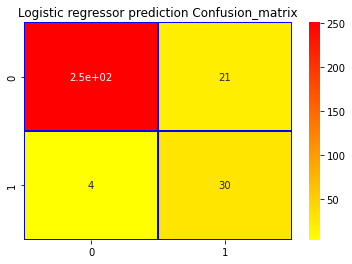

In [229]:
sns.heatmap(confusion_matrix(y_pred_log,y_test), annot=True, cmap='autumn_r',linewidth=0.1, linecolor='blue')
plt.title("Logistic regressor prediction Confusion_matrix")
print('accuracy_score is :' , 0.9183006535947712)

#### Random Forest Classifier Model

In [162]:
RFCpred = RFC.predict(x_test)
print('this is  the accuracy_score', accuracy_score(RFCpred,y_test))
print('this is  the confusion_matrix:', confusion_matrix(RFCpred,y_test))
print('this is  the  classification_report', classification_report(RFCpred,y_test))

this is  the accuracy_score 0.8496732026143791
this is  the confusion_matrix: [[255  46]
 [  0   5]]
this is  the  classification_report               precision    recall  f1-score   support

           0       1.00      0.85      0.92       301
           1       0.10      1.00      0.18         5

    accuracy                           0.85       306
   macro avg       0.55      0.92      0.55       306
weighted avg       0.99      0.85      0.91       306



accuracy_score is : 0.8496732026143791


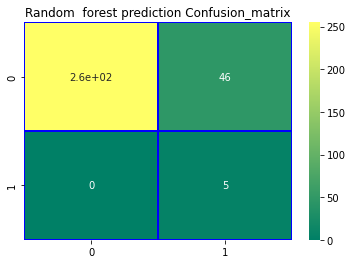

In [232]:
sns.heatmap(confusion_matrix(RFCpred,y_test), annot=True, cmap='summer',linewidth=0.1, linecolor='blue')
plt.title("Random  forest prediction Confusion_matrix")
print('accuracy_score is :' , 0.8496732026143791)

#### XG boost Classifier Model

In [165]:
XGBCpred = XGBC.predict(x_test)
print('this is  the accuracy_score', accuracy_score(XGBCpred,y_test))
print('this is  the confusion_matrix:', confusion_matrix(XGBCpred,y_test))
print('this is  the  classification_report', classification_report(XGBCpred,y_test))

this is  the accuracy_score 0.8790849673202614
this is  the confusion_matrix: [[248  30]
 [  7  21]]
this is  the  classification_report               precision    recall  f1-score   support

           0       0.97      0.89      0.93       278
           1       0.41      0.75      0.53        28

    accuracy                           0.88       306
   macro avg       0.69      0.82      0.73       306
weighted avg       0.92      0.88      0.89       306



accuracy_score is : 0.8496732026143791


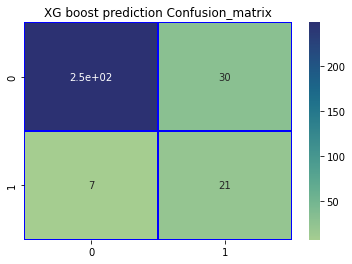

In [234]:
sns.heatmap(confusion_matrix(XGBCpred,y_test), annot=True, cmap='crest',linewidth=0.1, linecolor='blue')
plt.title("XG boost prediction Confusion_matrix")
print('accuracy_score is :' , 0.8496732026143791)

#### Support vector machine Classifier Model

In [172]:
SVpred = SV.predict(x_test)
print('this is  the accuracy_score', accuracy_score(SVpred,y_test))
print('this is  the confusion_matrix:', confusion_matrix(SVpred,y_test))
print('this is  the  classification_report', classification_report(SVpred,y_test))

this is  the accuracy_score 0.9183006535947712
this is  the confusion_matrix: [[253  23]
 [  2  28]]
this is  the  classification_report               precision    recall  f1-score   support

           0       0.99      0.92      0.95       276
           1       0.55      0.93      0.69        30

    accuracy                           0.92       306
   macro avg       0.77      0.93      0.82       306
weighted avg       0.95      0.92      0.93       306



accuracy_score is : 0.9183006535947712


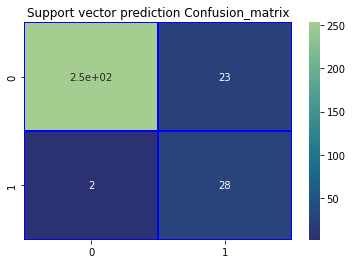

In [236]:
sns.heatmap(confusion_matrix(SVpred,y_test), annot=True, cmap='crest_r',linewidth=0.1, linecolor='blue')
plt.title("Support vector prediction Confusion_matrix")
print('accuracy_score is :' ,0.9183006535947712)

#### K Nearest Neighbors Classifier Model 

In [175]:
KNNpred = KNN.predict(x_test)
print('this is  the accuracy_score', accuracy_score(KNNpred,y_test))
print('this is  the confusion_matrix:', confusion_matrix(KNNpred,y_test))
print('this is  the  classification_report', classification_report(KNNpred,y_test))

this is  the accuracy_score 0.8562091503267973
this is  the confusion_matrix: [[253  42]
 [  2   9]]
this is  the  classification_report               precision    recall  f1-score   support

           0       0.99      0.86      0.92       295
           1       0.18      0.82      0.29        11

    accuracy                           0.86       306
   macro avg       0.58      0.84      0.61       306
weighted avg       0.96      0.86      0.90       306



accuracy_score is : 0.8562091503267973


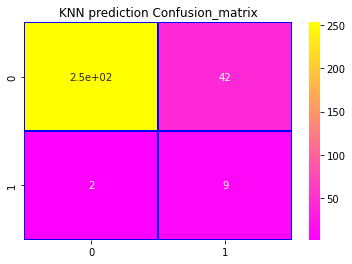

In [238]:
sns.heatmap(confusion_matrix(KNNpred,y_test), annot=True, cmap='spring',linewidth=0.1, linecolor='blue')
plt.title("KNN prediction Confusion_matrix")
print('accuracy_score is :' ,0.8562091503267973)

### Model Cross Validation
K-Fold CV

In [176]:
from sklearn.model_selection import cross_val_score as cvs

#### Logistic Regression

In [179]:
print(cvs(LOGR,scaled_x_best,y,cv=9).mean()) 

0.8831727412372573


#### Random Forest Classifier

In [180]:
print(cvs(RFC,scaled_x_best,y,cv=9).mean())

0.8449890611180934


#### XGB Classifier

In [181]:
print(cvs(XGBC,scaled_x_best,y,cv=9).mean())

0.8644556160685192


#### SVM Classifier

In [182]:
print(cvs(SV,scaled_x_best,y,cv=9).mean())

0.8824652050458502


#### K Nearest Neighbours Classifier

In [183]:
print(cvs(KNN,scaled_x_best,y,cv=9).mean())

0.8392217101894521


##### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Logistic    regression and  the SVM model  are the best models  as  both are  performing   the  same  in the  terms   of  Accuracy .

#### ROC AUC Scores

#### Logistic Regression

In [184]:
roc_auc_score(y_test,y_pred_log)

0.7862745098039217

#### Random Forest Classifier

In [185]:
roc_auc_score(y_test,RFCpred)

0.5490196078431373

#### XGB Classifier

In [186]:
roc_auc_score(y_test,XGBCpred)

0.692156862745098

#### SV Classifier

In [187]:
roc_auc_score(y_test,SVpred)

0.7705882352941177

#### K Nearest Neighbours Classifier

In [188]:
roc_auc_score(y_test,KNNpred)

0.5843137254901961

#### Making  a  diffrent  Instances in a list  for all  the Classifiers

In [192]:
classifiers =[LogisticRegression(solver='liblinear'),
RandomForestClassifier(n_estimators=600,random_state=71,criterion='gini', max_depth=4),
XGBClassifier(),
SVC(kernel='linear'),
KNeighborsClassifier()    
]

In [193]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [198]:
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yins = model.predict(x_test)
    
    fpr, tpr, _ = roc_curve(y_test,  yins)
    auc = roc_auc_score(y_test, yins)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [199]:
result_table.set_index('classifiers', inplace=True)

#### creating  the  Table of Evaluation for all  the  models

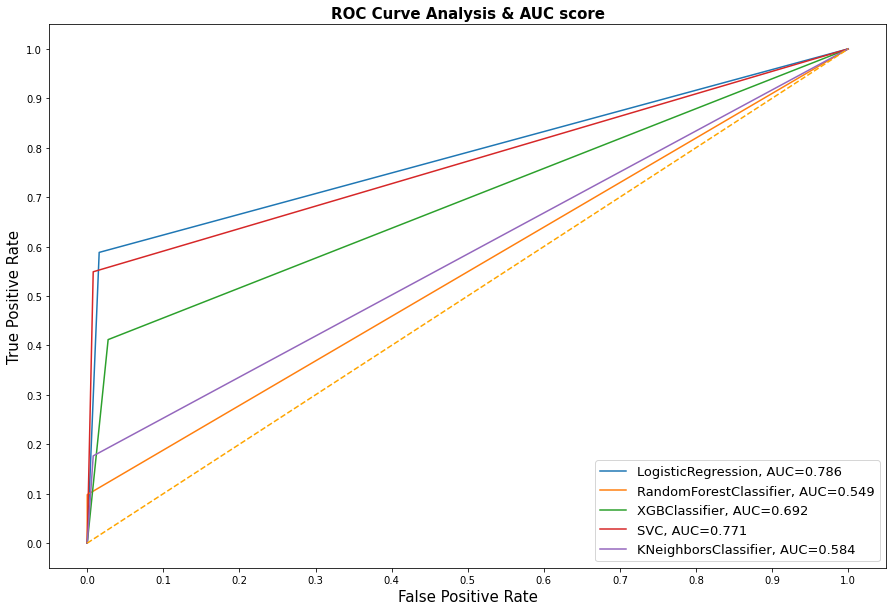

In [203]:
fig = plt.figure(figsize=(15,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis & AUC score', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

So  By  The  Roc curve and  the AUC  score  we  get  to know   that  on evaluation  
logistic Regression  performing   the  best  and   the  is    followed   by  the  Support Vector  machine

### Hyper Parameter Tuning Of Models

In [204]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression hypertune

Since  from  the Logistic  regression we  have  every  good output  thus we  apply  hypertuning firstly  on it 

In [207]:
parameter = {'C':[0.001,0.01,0.1,0,1,1.1],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'dual': [True,False],
             'fit_intercept':[True,False],
             'random_state':[1,2,3,5,10,20,45],
             'solver':['liblinear'],
             'max_iter':[100,200,300,400,500],
             'multi_class':['auto', 'ovr', 'multinomial']}

In [208]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=7,n_jobs = -1,verbose=2)

In [209]:
GridCV.fit(x_train,y_train)

Fitting 7 folds for each of 10080 candidates, totalling 70560 fits


GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1, 1.1],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, 400, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 5, 10, 20, 45],
                         'solver': ['liblinear']},
             verbose=2)

In [210]:
GridCV.best_params_

{'C': 0.1,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [211]:
Best_mod1 = LogisticRegression(C = 0.1,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod1.fit(x_train,y_train)
lrpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

91.83006535947712


As logistic regression gave us  the better validation score

also   gave better AUC score  than all

Thus we are  hypertuning Logistic  only  for  the getting  good  predtion results 

#### Logistic Regression has an accuracy score of 91%  

accuracy_score is : 91.83006535947712


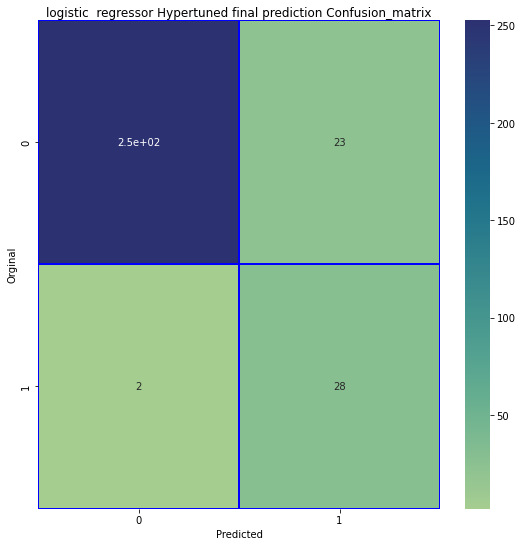

In [217]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(lrpred,y_test), annot=True, cmap='crest',linewidth=0.1, linecolor='blue')
plt.title("logistic  regressor Hypertuned final prediction Confusion_matrix",pad=True)
plt.xlabel('Predicted')
plt.ylabel('Orginal')
print('accuracy_score is :' , 91.83006535947712)

#### Saving The Model

In [218]:
import joblib
joblib.dump(Best_mod1,"BestModelHR_analytics.pkl")

['BestModelHR_analytics.pkl']

#### Loading The Model

In [219]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_mod1.predict(x_test))
Analytics_model = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Analytics_model

,Original,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
301,0,0
302,0,0
303,0,0
304,0,0


Text(0.5, 1.0, 'Original vs predicted  graph')

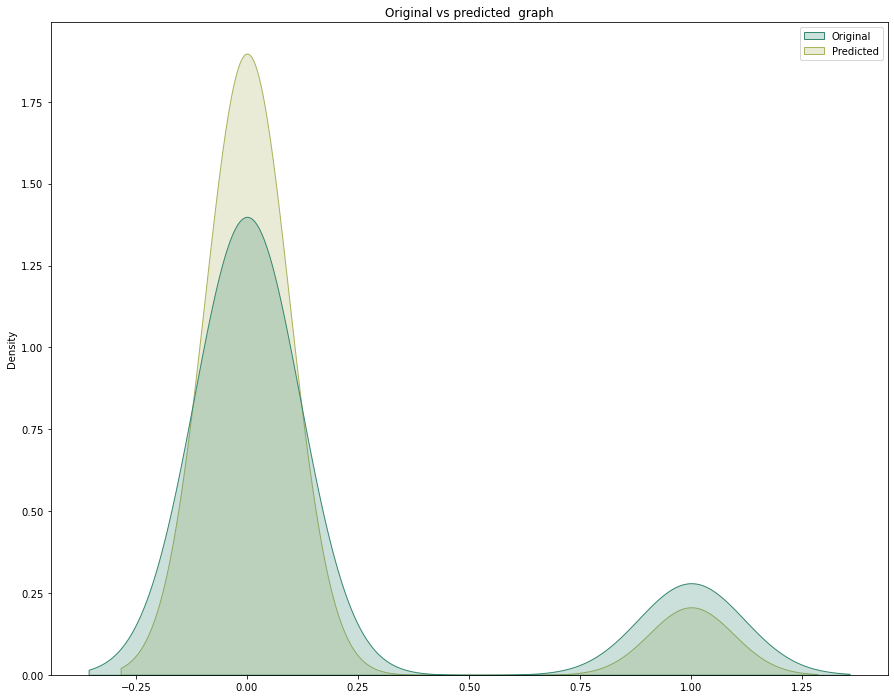

In [226]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Analytics_model, palette='gist_earth',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

By This  we  get  the  conclusion  that  how   good  is our model  is  performing  with  the Orginal    data  as  we  can  see  that the model  predictions  are  allinged  and  are predicting  almost  nearest to  the  - Orginal  data   given  Thus at last  we  can  declare  it  as  a  Good Machine  learning model 

In [228]:
pred_mod= Analytics_model.to_csv('HR model.csv')
# save  the  predictions for  record

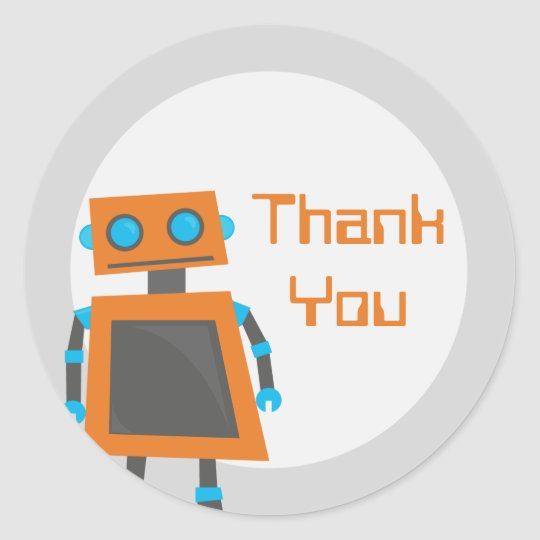

#### I TRIED LEARNING FROM  YOU WHICH  YOU  TAUGHT!!!